In [251]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [252]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv",low_memory=False,parse_dates=["date_time_of_pickup"])

In [253]:
df.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2


In [254]:
df.tail(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49990,16:00.0,4.5,2013-07-18 00:16:00+00:00,-74.002857,40.734137,-74.001610,40.739282,1
49991,56:19.0,10.5,2013-10-17 19:56:19+00:00,-73.991685,40.739494,-73.985357,40.731971,1
49992,41:47.0,6.1,2009-06-06 10:41:47+00:00,-73.984673,40.768434,-73.988215,40.760082,1
49993,27:00.0,7.3,2011-04-07 14:27:00+00:00,-73.982363,40.765060,-73.969167,40.761268,1
49994,57:00.0,8.5,2012-10-13 19:57:00+00:00,-73.976212,40.744832,-73.981567,40.724635,1
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14+00:00,-73.932603,40.763805,-73.932603,40.763805,1


In [255]:
df.sample(10)


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
12198,15:49.0,10.90,2010-12-15 22:15:49+00:00,-73.988637,40.722633,-73.985752,40.757477,1
4080,45:32.0,7.70,2011-10-19 19:45:32+00:00,-73.975355,40.749093,-73.983279,40.758726,1
25778,01:23.0,13.30,2011-02-27 23:01:23+00:00,-73.971519,40.648341,-73.988528,40.695941,3
34184,03:44.0,9.70,2012-07-24 19:03:44+00:00,-73.981065,40.744563,-74.007402,40.739408,2
49313,42:07.0,10.90,2011-03-16 17:42:07+00:00,-73.991291,40.770230,-73.953135,40.785089,1
9589,31:50.0,13.50,2014-09-23 21:31:50+00:00,-73.950758,40.786375,-73.978296,40.753787,1
43965,43:00.0,20.50,2013-05-02 05:43:00+00:00,-73.994705,40.714722,-73.948182,40.793090,1
23170,55:00.0,5.50,2013-07-20 23:55:00+00:00,-73.973475,40.743587,-73.975537,40.752000,1
32181,41:48.0,17.50,2013-02-21 07:41:48+00:00,0.000000,0.000000,0.000000,0.000000,2
5986,53:00.0,31.83,2014-01-07 17:53:00+00:00,0.000000,0.000000,0.000000,0.000000,1


In [256]:
df.shape

(50000, 8)

In [257]:
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [258]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [260]:
df.describe(include="all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00+00:00,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2009-01-01 01:31:49+00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-06-30 22:42:39+00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000


In [261]:
df.drop(['unique_id'],axis=1,inplace=True)

In [262]:
#Creating datetime features based on pickup_datetime
import calendar

df["pickup_date"]=df["date_time_of_pickup"].dt.date
df["pickup_day"]=df["date_time_of_pickup"].apply(lambda x:x.day)
df["pickup_hour"]=df["date_time_of_pickup"].apply(lambda x:x.hour)
df["pickup_day_of_week"]=df["date_time_of_pickup"].apply(lambda x:calendar.day_name[x.weekday()])
df["pickup_month"]=df["date_time_of_pickup"].apply(lambda x:x.month)
df["pickup_year"]=df["date_time_of_pickup"].apply(lambda x:x.year)


In [263]:
df.head(5)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [264]:
df.describe(include="all")

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
count,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000,50000.000000,50000.000000
unique,NaN,49555,NaN,NaN,NaN,NaN,NaN,2371,NaN,NaN,7,NaN,NaN
top,NaN,2011-09-03 01:30:00+00:00,NaN,NaN,NaN,NaN,NaN,2012-12-01,NaN,NaN,Friday,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,42,NaN,NaN,7668,NaN,NaN
first,NaN,2009-01-01 01:31:49+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-06-30 22:42:39+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840,NaN,15.672040,13.489080,NaN,6.273300,2011.739260
std,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195,NaN,8.660789,6.506935,NaN,3.461157,1.862639
min,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,NaN,1.000000,0.000000,NaN,1.000000,2009.000000
25%,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000,NaN,8.000000,9.000000,NaN,3.000000,2010.000000


In [265]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_month,pickup_year
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,15.672040,13.489080,6.273300,2011.739260
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,8.660789,6.506935,3.461157,1.862639
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


<Axes: ylabel='amount'>

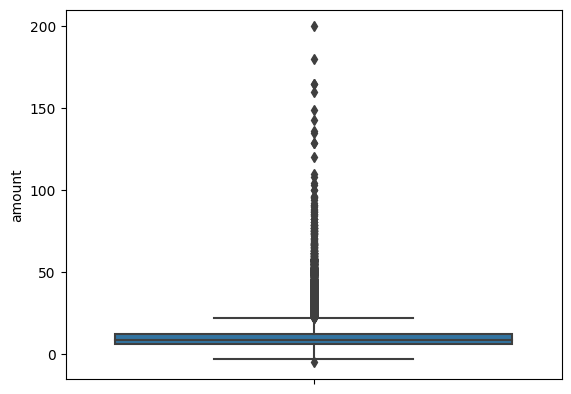

In [266]:
sns.boxplot(y="amount",data=df)

In [267]:
#in some places the amount is negative
#so remove 0 passenger count

In [268]:
#Removing Outlier value
df=df[((df["longitude_of_pickup"] > -78) &
       (df["longitude_of_pickup"] < -70)) &
      ((df["longitude_of_dropoff"] > -78) &
       (df["longitude_of_dropoff"] < -70))&
      ((df["latitude_of_pickup"] > 37) &
       (df["latitude_of_pickup"] < 45)) &
      ((df["latitude_of_dropoff"] > 37) &
       (df["latitude_of_dropoff"] < 45)) &
      (df["no_of_passenger"] > 0) &
      (df["amount"] >= 2.5)]

In [269]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_month,pickup_year
count,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.00000,48803.000000,48803.000000,48803.000000,48803.000000
mean,11.367383,-73.975140,40.750930,-73.973992,40.751505,1.67461,15.664139,13.482757,6.276233,2011.739770
std,9.663228,0.045043,0.038094,0.039563,0.038705,1.28866,8.659466,6.504260,3.461211,1.867738
min,2.500000,-75.423848,38.754215,-75.354559,39.604971,1.00000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992309,40.736501,-73.991332,40.735905,1.00000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.982121,40.753446,-73.980483,40.754122,1.00000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.968369,40.767776,-73.965327,40.768482,2.00000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,-70.140793,43.098708,-72.854940,43.415190,6.00000,31.000000,23.000000,12.000000,2015.000000


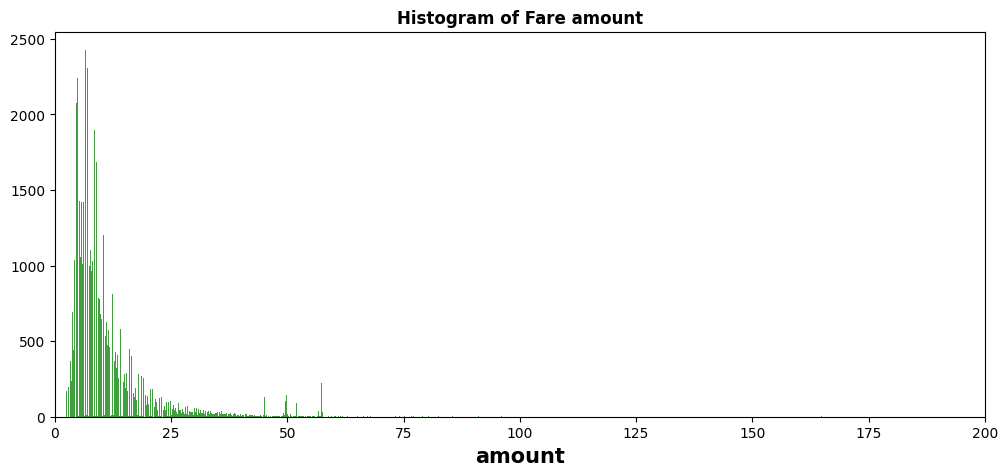

In [270]:
plt.figure(figsize=(12,5))
n,bins,patches=plt.hist(df.amount,1000,facecolor="green",alpha=0.75)
plt.xlabel('amount',fontsize=15,fontweight='bold')
plt.title('Histogram of Fare amount',fontweight='bold')
plt.xlim(0,200)
plt.show()

Text(0.5, 1.0, 'Distribution of fare amount in log scale')

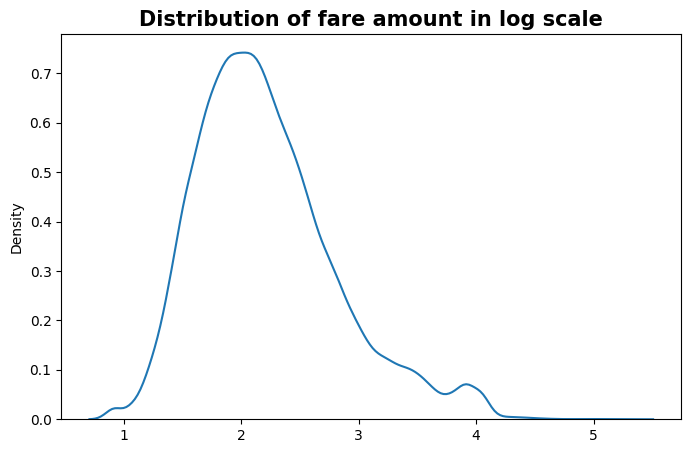

In [271]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df["amount"].values)).set_title("Distribution of fare amount in log scale",fontsize=15,fontweight='bold')

In [272]:
#analysing top 5 Fare amount
df["amount"].value_counts(normalize=True).iloc[:5]

6.5    0.049423
4.5    0.042190
8.5    0.038563
5.3    0.028810
6.1    0.028769
Name: amount, dtype: float64

<Axes: xlabel='no_of_passenger', ylabel='count'>

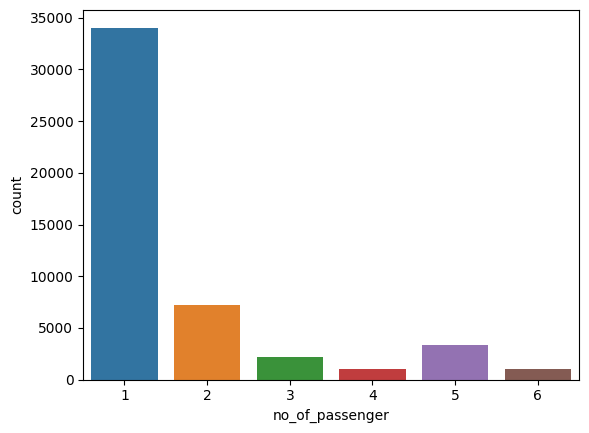

In [273]:
sns.countplot(x="no_of_passenger",data=df)

<Axes: xlabel='pickup_year', ylabel='count'>

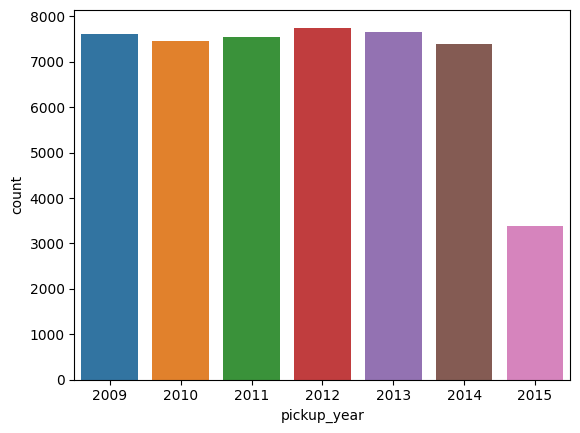

In [274]:
sns.countplot(x="pickup_year",data=df)

<Axes: xlabel='pickup_day_of_week', ylabel='count'>

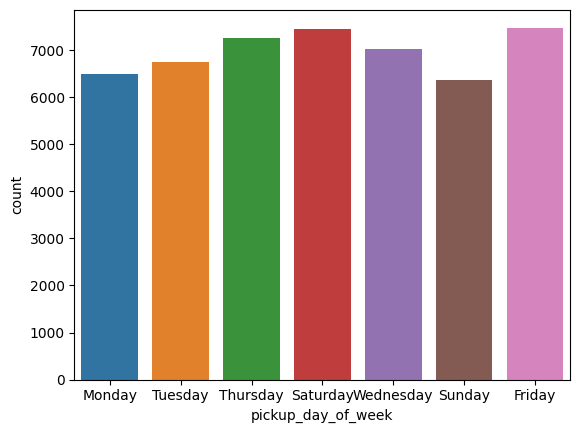

In [275]:
sns.countplot(x="pickup_day_of_week",data=df)

In [276]:
df["no_of_passenger"].value_counts()

1    34055
2     7254
5     3381
3     2146
4      991
6      976
Name: no_of_passenger, dtype: int64

(-74.03, -73.75)

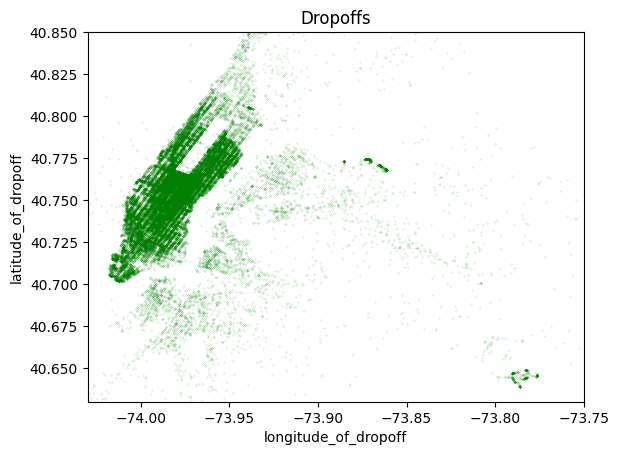

In [277]:
#in which longitude and latitude the pick ups are more
city_long_border = (-74.03,-73.75)
city_lat_border=(40.63,40.85)
df.plot(kind="scatter" , x="longitude_of_dropoff",y="latitude_of_dropoff",color="green",s=.02,alpha=.6)
plt.title('Dropoffs')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

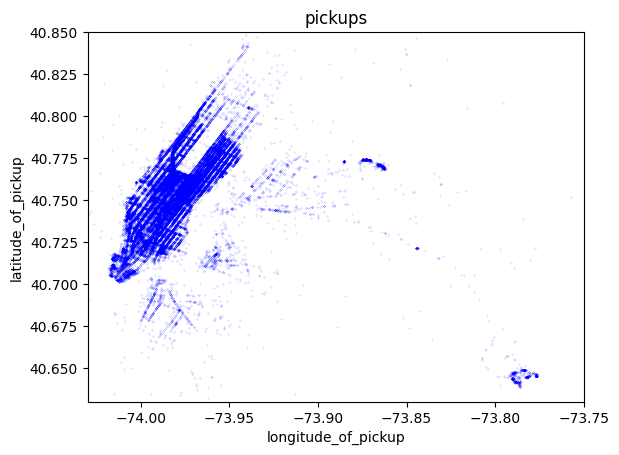

In [278]:
df.plot(kind="scatter" , x="longitude_of_pickup",y="latitude_of_pickup",color="blue",s=.02,alpha=.6)
plt.title('pickups')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [279]:
#calculate spherical distance with given latitudes and longitudes
def distance(lat1, lon1, lat2, lon2):
  p=0.017453292519943295 #pi/180 /2
  a=0.5 - np.cos((lat2-lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1-np.cos((lon2-lon1) * p))
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))
  
#add new column to dataframe with distance in miles
df['distance_miles']=distance(df.latitude_of_pickup,df.longitude_of_pickup,\
                              df.latitude_of_dropoff,df.longitude_of_dropoff)
df.head(5)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.655920
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.592509
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.971379
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.754824
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.378909


Text(0.5, 1.0, 'Distribution Distance in miles')

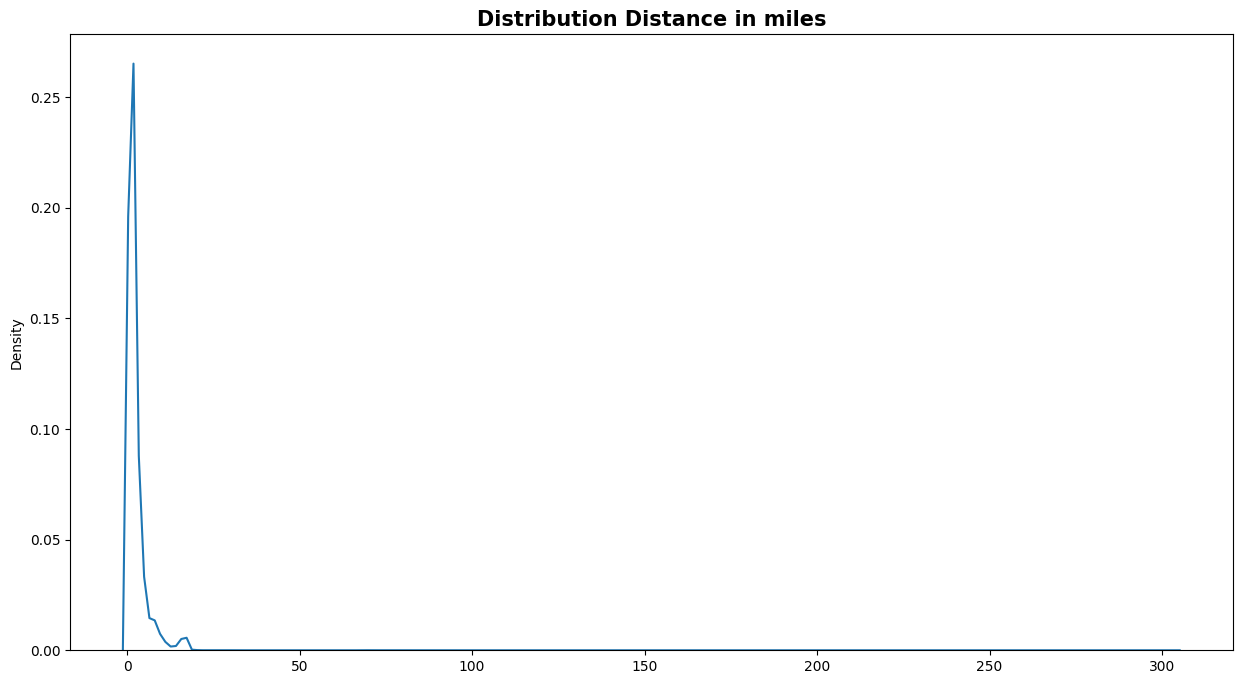

In [280]:
plt.figure(figsize=(15,8))
sns.kdeplot(df["distance_miles"].values).set_title(
    "Distribution Distance in miles",fontsize=15,fontweight='bold'
)

In [281]:
df_final=df.copy()
df_final.head(5)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.655920
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.592509
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.971379
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.754824
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.378909


In [282]:
#Imputing categorical variables
Variables={'Monday' : 1,'Tuesday' : 2,'Wednesday' : 3,'Thursday' : 4,'Friday' : 5,'Saturday' : 6,'sunday' : 7}
year={2009: 1,2010: 2,2011: 3,2012: 4,2013: 5,2014: 6,2017: 7}
df_final['pickup_year']=df_final['pickup_year'].map(year)
df_final['pickup_day_of_week']=df_final['pickup_day_of_week'].map(Variables)
df_final.drop(['date_time_of_pickup','pickup_date'],axis=1,inplace=True)
df_final.head(5)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1.0,6,1.0,0.655920
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2.0,1,2.0,5.592509
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4.0,8,3.0,0.971379
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6.0,4,4.0,1.754824
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2.0,3,2.0,1.378909


In [283]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48803 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                48803 non-null  float64
 1   longitude_of_pickup   48803 non-null  float64
 2   latitude_of_pickup    48803 non-null  float64
 3   longitude_of_dropoff  48803 non-null  float64
 4   latitude_of_dropoff   48803 non-null  float64
 5   no_of_passenger       48803 non-null  int64  
 6   pickup_day            48803 non-null  int64  
 7   pickup_hour           48803 non-null  int64  
 8   pickup_day_of_week    42445 non-null  float64
 9   pickup_month          48803 non-null  int64  
 10  pickup_year           45420 non-null  float64
 11  distance_miles        48803 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 4.8 MB


In [346]:
df_final.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
pickup_day              0
pickup_hour             0
pickup_day_of_week      0
pickup_month            0
pickup_year             0
distance_miles          0
dtype: int64

In [347]:
mode1=df_final['pickup_day_of_week'].mode().values[0]
mode1

5.0

In [348]:
df_final['pickup_day_of_week'].replace(np.nan,mode1,inplace=True)

In [349]:
mode2=df_final['pickup_year'].mode().values[0]
mode2

4.0

In [350]:
df_final['pickup_year'].replace(np.nan,mode2,inplace=True)

In [351]:
df_final.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
pickup_day              0
pickup_hour             0
pickup_day_of_week      0
pickup_month            0
pickup_year             0
distance_miles          0
dtype: int64

In [352]:
median1=df['amount'].median()
median1

8.5

In [353]:
df['amount'].replace(np.nan,median1,inplace=True)

In [354]:
X=df_final.drop(['amount'],axis=1)
y=df_final[['amount']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.202,random_state=42)

In [355]:
X_test.shape

(9859, 11)

In [356]:
X_train.shape

(38944, 11)

In [357]:
y_test.shape

(9859, 1)

In [358]:
y_train.shape

(38944, 1)

In [359]:
from sklearn.linear_model import LinearRegression
 
lr=LinearRegression()

In [360]:
lr.fit(X_train,y_train)

LinearRegression()

In [397]:
lr.score(X_train,y_train)

0.5799555266558946

In [398]:
lr.score(X_test,y_test)

0.06540960498763804

In [393]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=1,n_estimators=100)


In [394]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=1)

In [395]:
rf.score(X_train,y_train)

0.5401810386051387

In [396]:
rf.score(X_test,y_test)

0.5521920630935833